# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from citipy import citipy
from api_keys import api_key

In [21]:
# Initiate variables
temp_type = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_type}&q="
# Set the range for lat and lon
lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [24]:
# Create empty lists to store our data
lat_lon_list = []
cities_list = []

# Creat a set of random lats and lons
latitude = np.random.uniform(low = -90, high = 90, size = 1500)
longitude = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lon_list = zip(latitude, longitude)

# Create loop to add random coordinates and cities to their lists
for x in lat_lon_list:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    if city not in cities_list:
        cities_list.append(city)
        
len(cities_list)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Create empty lists for each data set
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

records = 0
sets = 1
# loop through response data
for city in cities_list:
    try:
        response = requests.get(query_url + city.replace(" ", "&")).json()
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(1.01)
        
        if records > 48:
            records = 1
            sets += 1
            city_name.append(city)
        else:
            records += 1
            city_name.append(city)
        print(f"Processing record number {records} in set number {sets} | {city}")
    except:
        print("City not found. Skipping...")


Processing record number 1 in set number 1 | hilo
Processing record number 2 in set number 1 | anadyr
Processing record number 3 in set number 1 | yellowknife
City not found. Skipping...
Processing record number 4 in set number 1 | tasiilaq
Processing record number 5 in set number 1 | lebu
Processing record number 6 in set number 1 | sioux lookout
Processing record number 7 in set number 1 | cape town
Processing record number 8 in set number 1 | smithers
Processing record number 9 in set number 1 | ushuaia
Processing record number 10 in set number 1 | baniachang
Processing record number 11 in set number 1 | san jose de rio tinto
Processing record number 12 in set number 1 | mataura
Processing record number 13 in set number 1 | ambilobe
Processing record number 14 in set number 1 | guerrero negro
Processing record number 15 in set number 1 | esmeraldas
Processing record number 16 in set number 1 | pisco
Processing record number 17 in set number 1 | bethel
Processing record number 18 in 

City not found. Skipping...
Processing record number 43 in set number 3 | bereda
Processing record number 44 in set number 3 | russell
Processing record number 45 in set number 3 | kahului
Processing record number 46 in set number 3 | pietarsaari
City not found. Skipping...
Processing record number 47 in set number 3 | arlit
Processing record number 48 in set number 3 | puerto ayora
Processing record number 49 in set number 3 | wanning
Processing record number 1 in set number 4 | sanwer
Processing record number 2 in set number 4 | hamilton
Processing record number 3 in set number 4 | kayerkan
Processing record number 4 in set number 4 | kavieng
Processing record number 5 in set number 4 | coihaique
Processing record number 6 in set number 4 | sorong
Processing record number 7 in set number 4 | peterhead
Processing record number 8 in set number 4 | mukhen
Processing record number 9 in set number 4 | charlestown
Processing record number 10 in set number 4 | udayagiri
Processing record nu

Processing record number 37 in set number 6 | riyadh
Processing record number 38 in set number 6 | ribeira grande
Processing record number 39 in set number 6 | acari
Processing record number 40 in set number 6 | talnakh
City not found. Skipping...
Processing record number 41 in set number 6 | kismayo
Processing record number 42 in set number 6 | sao jose da coroa grande
Processing record number 43 in set number 6 | saiha
Processing record number 44 in set number 6 | kapoeta
Processing record number 45 in set number 6 | qui nhon
Processing record number 46 in set number 6 | waipawa
Processing record number 47 in set number 6 | san antonio
Processing record number 48 in set number 6 | opuwo
Processing record number 49 in set number 6 | tambun
Processing record number 1 in set number 7 | cabra
Processing record number 2 in set number 7 | soe
Processing record number 3 in set number 7 | marrakesh
Processing record number 4 in set number 7 | hosakote
Processing record number 5 in set number

Processing record number 31 in set number 9 | kaseda
Processing record number 32 in set number 9 | kalianget
Processing record number 33 in set number 9 | kpandae
Processing record number 34 in set number 9 | raudeberg
Processing record number 35 in set number 9 | mitu
Processing record number 36 in set number 9 | oyem
City not found. Skipping...
Processing record number 37 in set number 9 | sambava
Processing record number 38 in set number 9 | udachnyy
Processing record number 39 in set number 9 | weyburn
Processing record number 40 in set number 9 | chumikan
Processing record number 41 in set number 9 | boa vista
Processing record number 42 in set number 9 | langsa
Processing record number 43 in set number 9 | kupang
Processing record number 44 in set number 9 | mecca
Processing record number 45 in set number 9 | lambarene
Processing record number 46 in set number 9 | goderich
Processing record number 47 in set number 9 | bellmead
Processing record number 48 in set number 9 | amarant

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Create a dictionary to store the results
weather_data = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_df = pd.DataFrame(weather_data)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,84.20,66,1,13.87,US,1602902240
1,anadyr,64.75,177.48,35.60,93,90,14.76,RU,1602902240
2,yellowknife,62.46,-114.35,25.00,85,90,16.11,CA,1602902241
3,tasiilaq,65.61,-37.64,33.80,74,94,21.92,GL,1602902241
4,lebu,-37.62,-73.65,49.84,94,81,2.82,CL,1602902190


In [32]:
weather_df.to_csv("../Output_Data/Weather_Data")

In [39]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,23.528564,25.717397,59.755655,72.335727,50.800718,7.427343,1.602902e+09
std,31.200218,86.802558,19.024590,20.962206,39.714468,5.624795,6.460201e+01
min,-54.800000,-175.200000,0.430000,9.000000,0.000000,0.130000,1.602902e+09
25%,-2.020000,-46.650000,46.400000,61.000000,3.000000,3.360000,1.602902e+09
50%,29.960000,29.760000,60.400000,76.000000,57.000000,5.820000,1.602902e+09
75%,48.630000,100.340000,76.960000,89.000000,90.000000,9.640000,1.602902e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,43.820000,1.602902e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
weather_df["Humidity"].max()
# There are no cities GREATER than 100% humidity, the max is 100%.

100

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
quartiles = weather_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 61.0
The upper quartile of humidity is: 89.0
The interquartile range of humidity is: 28.0
The the median of humidity is: 76.0 
Values below 19.0 could be outliers.
Values above 131.0 could be outliers.


In [53]:
clean_city_data = pd.DataFrame(weather_df[weather_df.Humidity >= 19])
clean_city_data.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [54]:
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,84.20,66,1,13.87,US,1602902240
1,anadyr,64.75,177.48,35.60,93,90,14.76,RU,1602902240
2,yellowknife,62.46,-114.35,25.00,85,90,16.11,CA,1602902241
3,tasiilaq,65.61,-37.64,33.80,74,94,21.92,GL,1602902241
4,lebu,-37.62,-73.65,49.84,94,81,2.82,CL,1602902190


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

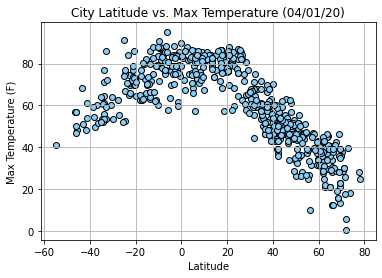

In [55]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

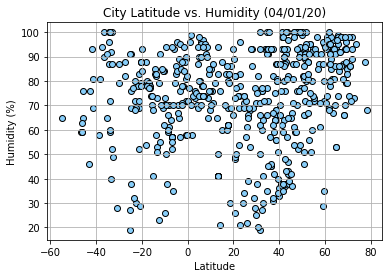

In [57]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

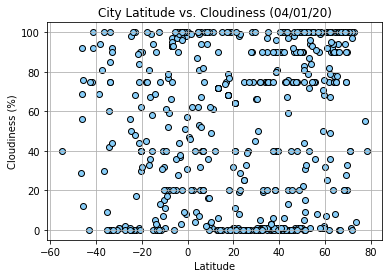

In [59]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

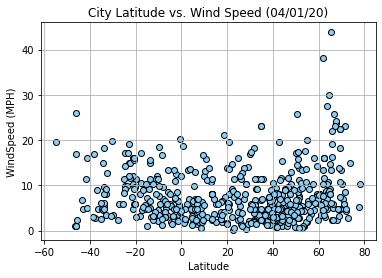

In [60]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="lightskyblue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (MPH)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression